In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
sr = pd.Series( [90,90,55,60,76,80,76,88,30,25],
               name="국어점수" )
sr.index=['홍길동','이순신','임꺽정','정난정',
         '이이','이황','정도전','김철수1',
          '김철수2','김철수3']
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

# 1. 국어점수가 가장 큰 값을 구하시오.

In [3]:
sr.max()

90

# 2. 국어점수가 가장 큰 값의 이름을 구하시오.

In [4]:
mx = sr.max()
sr[sr == mx]

홍길동    90
이순신    90
Name: 국어점수, dtype: int64

In [42]:
# 혹은 
sr.nlargest(1, keep='all')

홍길동    90
이순신    90
Name: 국어점수, dtype: int64

# 3. 국어점수가 80점 이상인 값을 구하시오.

In [5]:
sr[sr>=80]

홍길동     90
이순신     90
이황      80
김철수1    88
Name: 국어점수, dtype: int64

# 4. 국어 점수가 50점 이상 80점 이하인 값을 구하시오.

In [6]:
sr[sr.between(50, 80)]

임꺽정    55
정난정    60
이이     76
이황     80
정도전    76
Name: 국어점수, dtype: int64

# 5. 이름이 김으로 시작하는 데이터를 구하시오.

In [7]:
sr[sr.index.str.contains('^김')]

김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

# 6. 국어점수의 평균을 구하시오.

In [8]:
sr.mean()

67.0

# 7. 국어점수의 총합을 구하시오.

In [9]:
sr.sum()

670

# 8. 국어점수의 표준편차를 구하시오.

In [10]:
sr.std()

23.935097428021656

# 9. 국어점수가 40점 이하인 데이터를 삭제하시오.

In [11]:
sr.drop(sr[sr<=40].index)

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
Name: 국어점수, dtype: int64

# 10. 국어점수가 50점이상인 데이터에 가산점 10%를 
# 미만인경우는 20%를 부여하시오.

In [12]:
sr.apply(lambda v: v*1.1 if v>= 50 else v*1.2)
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

# 11. 국어점수 top 5를 구하시오.

In [44]:
sr.nlargest(5, keep='all')

홍길동     90
이순신     90
김철수1    88
이황      80
이이      76
정도전     76
Name: 국어점수, dtype: int64

# 12. 국어점수가 50점 이상인 데이터의 바차트를 그리시오.

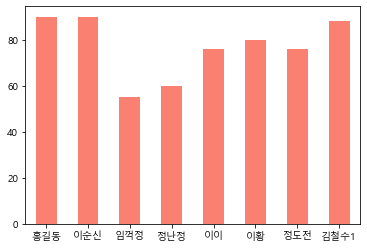

In [14]:
sr[sr>=50].plot(kind='bar', rot=0, color='salmon')
plt.show()

# 13. 국어점수의 범위별 도수를 구하시오.
# (범위 : 0 ~ 50, 50 ~ 70, 70 ~ 100)

In [15]:
pd.cut(sr, [0, 50, 70, 100]).value_counts().sort_index()

(0, 50]      2
(50, 70]     2
(70, 100]    6
Name: 국어점수, dtype: int64

# 14. 아래처럼 출력하시요(70점이상 합격 미만 불합격)

<pre>
========================
이름     국어   합격여부
========================
홍길동   90      합격
이순신   90      합격
....
</pre>

In [16]:
print('='*30)
print('이름', '국어', '합격여부', sep='\t')
print('='*30)

arr = sr.values
a = np.where(arr>=70, '합격', '불합격')

for name, score, pf in zip(sr.index, sr.values, a):
    print(name, score, pf, sep='\t')

이름	국어	합격여부
홍길동	90	합격
이순신	90	합격
임꺽정	55	불합격
정난정	60	불합격
이이	76	합격
이황	80	합격
정도전	76	합격
김철수1	88	합격
김철수2	30	불합격
김철수3	25	불합격


In [46]:
# 혹은 삼항연산자 사용

for i, v in sr.items():
    print(i, v, '합격' if v>=70 else '불합격', sep='\t')

홍길동	90	합격
이순신	90	합격
임꺽정	55	불합격
정난정	60	불합격
이이	76	합격
이황	80	합격
정도전	76	합격
김철수1	88	합격
김철수2	30	불합격
김철수3	25	불합격


In [49]:
# 혹은 apply함수 사용

a = sr.apply(lambda v: '합격' if v>=70 else '불합격')

for i, v, p in zip(sr.index, sr, a):
    print(i, v, p, sep='\t')

홍길동	90	합격
이순신	90	합격
임꺽정	55	불합격
정난정	60	불합격
이이	76	합격
이황	80	합격
정도전	76	합격
김철수1	88	합격
김철수2	30	불합격
김철수3	25	불합격


# ===================

# 1. 이름순으로 정렬하시오.

In [17]:
sr.sort_index()

김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64

# 2. 키보드로 입력받아 검색된 이름의 점수를 구하시오.
# 이름:홍길동
# 70


In [19]:
a = input('이름 : ')
a
print(sr[a])

이름 : 홍길동
90


# 3. 데이터를 다음과 같이 출력하시오.

<pre>
(0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
---------------------
    이름    국어   학점
---------------------
    홍길동  70	    C
    ...
    김철수3 25      F
</pre>

In [52]:
print('='*30)
print('이름', '국어', '학점', sep='\t')
print('='*30)

a = pd.cut(sr, [0, 59, 69, 79, 89, 100], labels=['F','D','C', 'B', 'A'])

for name, score, pf in zip(sr.index, sr, a):
    print(name, score, pf, sep='\t')

이름	국어	학점
홍길동	90	A
이순신	90	A
임꺽정	55	F
정난정	60	D
이이	76	C
이황	80	B
정도전	76	C
김철수1	88	B
김철수2	30	F
김철수3	25	F


# 4. 국어 점수 50점이하는 가산점 20를 부여하고
#    국어 점수 50점초과는 가산점 10를 부여하시오.

In [36]:
sr.apply(lambda v: v+20 if v<=50 else v+10 )
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

# 5. 국어점수 10%, 50%, 90%에 해당하는 값을 구하시오.

In [35]:
sr.quantile([0.1, 0.5, 0.9])

0.1    29.5
0.5    76.0
0.9    90.0
Name: 국어점수, dtype: float64

# 6. 각 국어점수에 대한 개수를 구하시오.

In [53]:
sr.value_counts().sort_index(ascending=False)

90    2
88    1
80    1
76    2
60    1
55    1
30    1
25    1
Name: 국어점수, dtype: int64

# 7. 국어점수에 대한 boxplot을 그리시요.

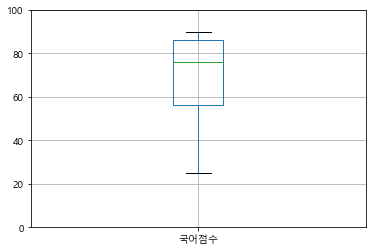

In [54]:
sr.plot(kind='box', grid=True, ylim=(0,100))
plt.show()

# 8. 국어 점수를 10개(0~100점)로 분할한 경우 
# 각 점수별 도수분포표를 구하고 히스토그램을 구하시오.
# (도수분포표 샘플)

In [59]:
# 계급, 도수

result = pd.cut(sr,range(0,101,10)).value_counts().sort_index()
result

(0, 10]      0
(10, 20]     0
(20, 30]     2
(30, 40]     0
(40, 50]     0
(50, 60]     2
(60, 70]     0
(70, 80]     3
(80, 90]     3
(90, 100]    0
Name: 국어점수, dtype: int64

In [73]:
#계급값

cv = list(range( 5,96,10) )
cv

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [74]:
# 누적도수 방법1

srsum = []
defalts = 0
for i in result:
    defalts += i
    srsum.append(defalts)
srsum

[0, 0, 2, 2, 2, 4, 4, 7, 10, 10]

In [75]:
# 누적도수 방법2

result.cumsum()

(0, 10]       0
(10, 20]      0
(20, 30]      2
(30, 40]      2
(40, 50]      2
(50, 60]      4
(60, 70]      4
(70, 80]      7
(80, 90]     10
(90, 100]    10
Name: 국어점수, dtype: int64

In [76]:
# 상대도수

result/result.sum()

(0, 10]      0.0
(10, 20]     0.0
(20, 30]     0.2
(30, 40]     0.0
(40, 50]     0.0
(50, 60]     0.2
(60, 70]     0.0
(70, 80]     0.3
(80, 90]     0.3
(90, 100]    0.0
Name: 국어점수, dtype: float64

In [79]:
print('계급','계급값', '도수','누적도수','상대도수', sep='\t')
print('-'*40)

for idx,b,c,d,e in zip(result.index, cv, result, result.cumsum(), result/result.sum() ):
    print( f'{str(idx):10}{b:5}{c:5}{d:5}{e:5}')

계급	계급값	도수	누적도수	상대도수
----------------------------------------
(0, 10]       5    0    0  0.0
(10, 20]     15    0    0  0.0
(20, 30]     25    2    2  0.2
(30, 40]     35    0    2  0.0
(40, 50]     45    0    2  0.0
(50, 60]     55    2    4  0.2
(60, 70]     65    0    4  0.0
(70, 80]     75    3    7  0.3
(80, 90]     85    3   10  0.3
(90, 100]    95    0   10  0.0


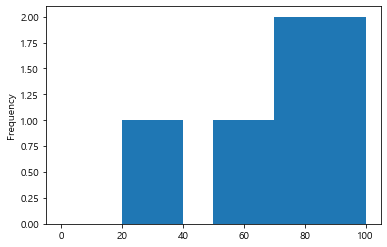

In [78]:
sr.plot(kind='hist', bins=list(range(0,101,10)))
plt.show()

# 9. 과일의 비율을 파이차트로 그리시오.

In [28]:
fruit=pd.Series( [10,20,30,50],index=['사과','딸기','포도','수박'] , name='과일')

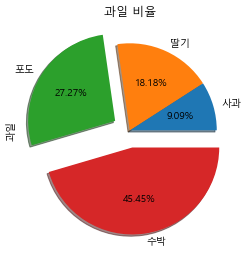

In [57]:
fruit.plot(kind='pie',autopct='%.2f%%', shadow=True, explode=[0,0,0.2,0.2])
plt.title('과일 비율')
plt.show()